In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model15_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.AvgPool2d, pool2 = nn.MaxPool2d),
    post_conv=post_conv0,
    ratio = 3
)
he_initialization(model15_0)
describe(model15_0)

MACs: 35.3 MMac, Params: 12.48 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-4               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-5              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 

Loading checkpoint from model_weights/model15_0.pt
Starting
Epoch 1/10: Train loss = 0.4847, Train accuracy = 0.7687, Test loss = 0.4904, Test accuracy = 0.7577


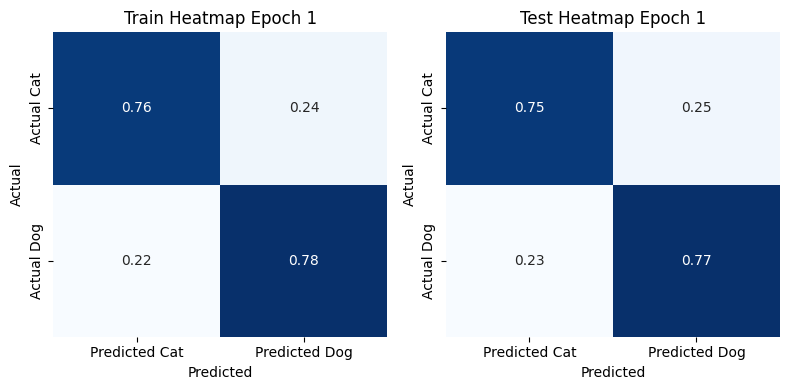

Epoch 2/10: Train loss = 0.4067, Train accuracy = 0.8127, Test loss = 0.4168, Test accuracy = 0.8065


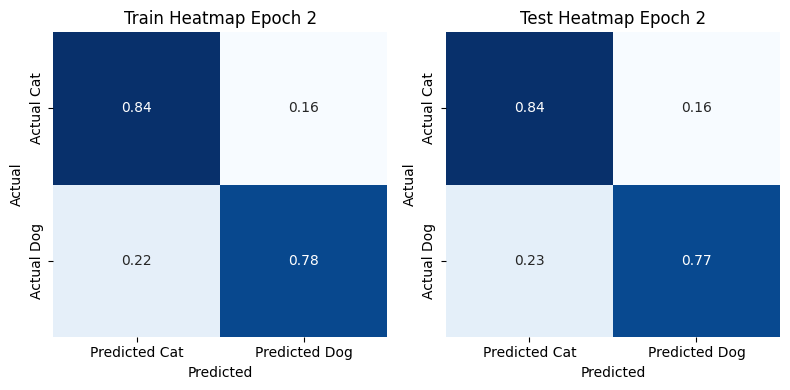

Epoch 3/10: Train loss = 0.3761, Train accuracy = 0.8333, Test loss = 0.3889, Test accuracy = 0.8217


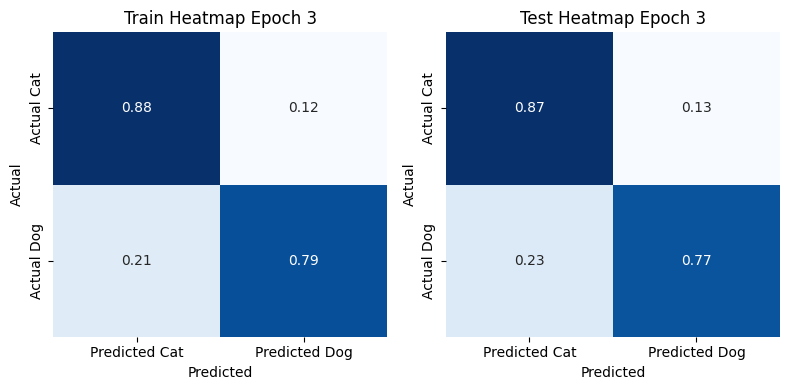

Epoch 4/10: Train loss = 0.3916, Train accuracy = 0.8188, Test loss = 0.4031, Test accuracy = 0.8129


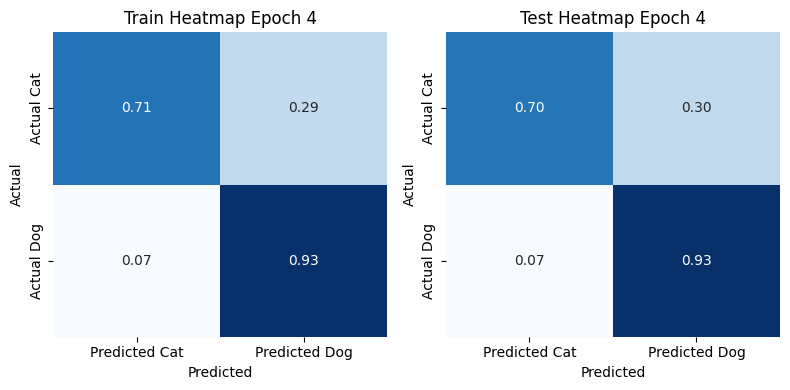

Epoch 5/10: Train loss = 0.3064, Train accuracy = 0.8657, Test loss = 0.3389, Test accuracy = 0.8504


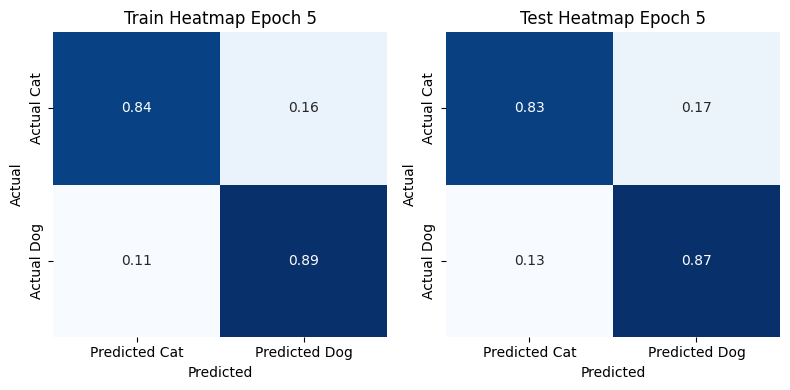

Epoch 6/10: Train loss = 0.3066, Train accuracy = 0.8665, Test loss = 0.3463, Test accuracy = 0.8450


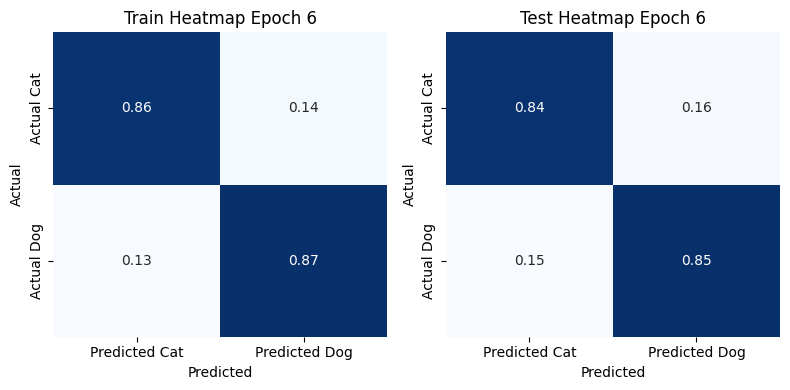

Epoch 7/10: Train loss = 0.2775, Train accuracy = 0.8813, Test loss = 0.3184, Test accuracy = 0.8641


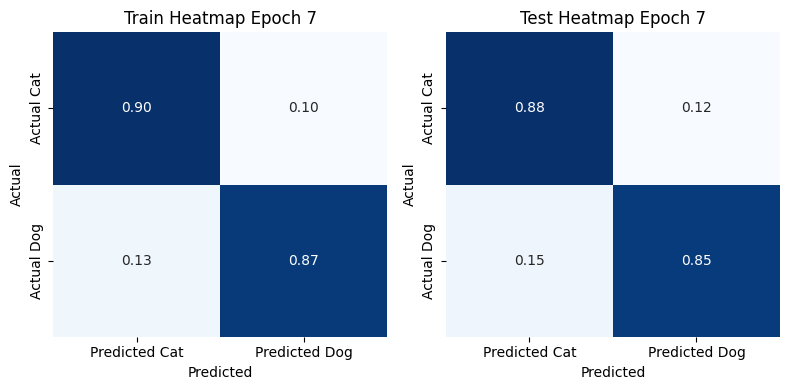

Epoch 8/10: Train loss = 0.2595, Train accuracy = 0.8910, Test loss = 0.3064, Test accuracy = 0.8685


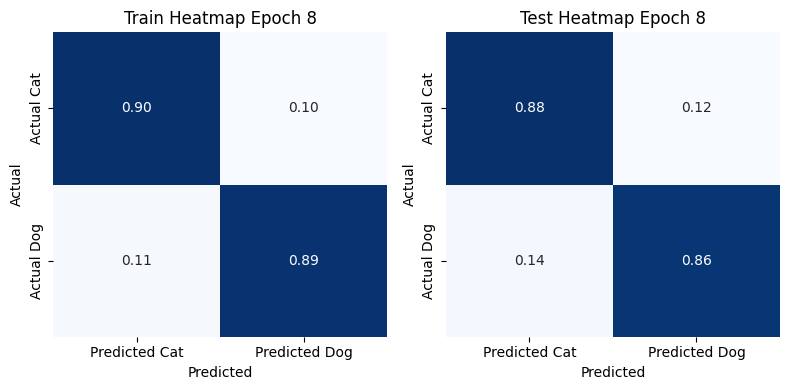

Epoch 9/10: Train loss = 0.2552, Train accuracy = 0.8917, Test loss = 0.3106, Test accuracy = 0.8641


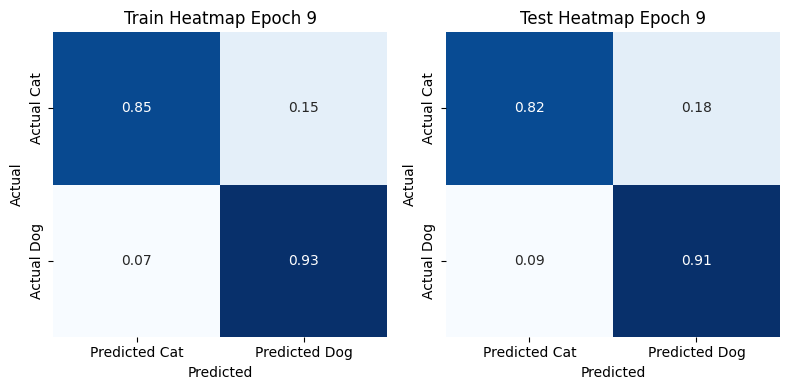

Epoch 10/10: Train loss = 0.2470, Train accuracy = 0.8965, Test loss = 0.3078, Test accuracy = 0.8687


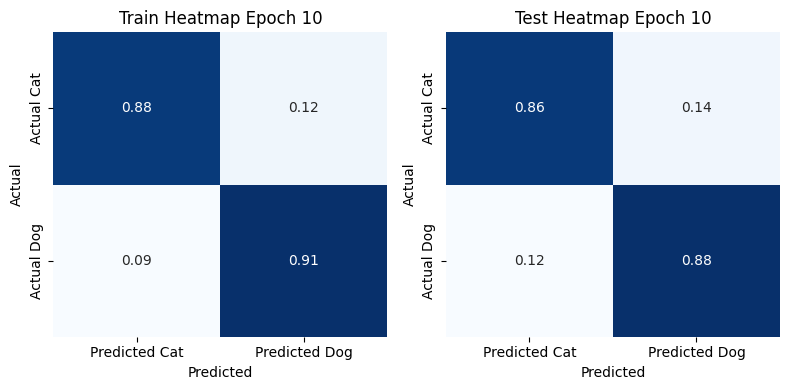

Training complete.


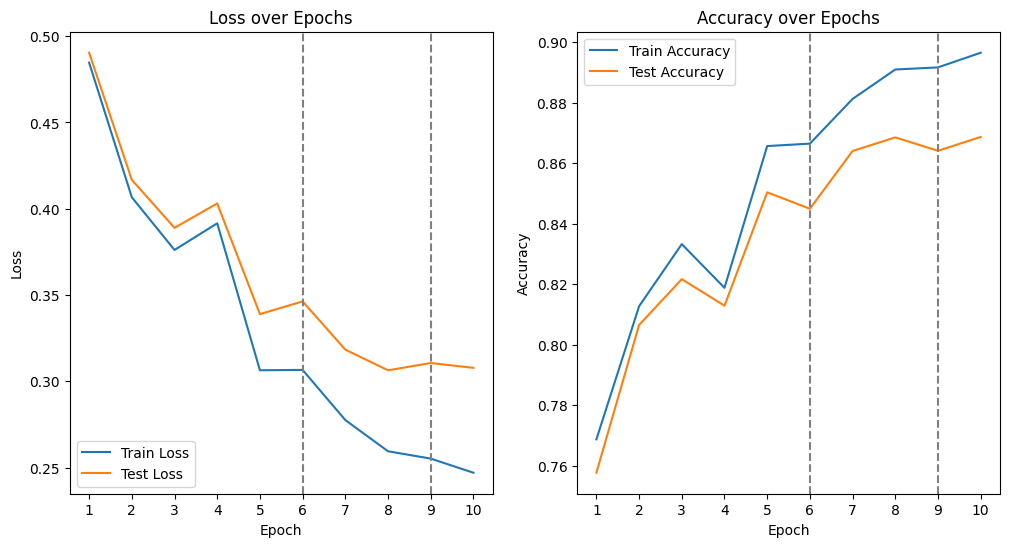

In [5]:
train(model15_0,"model_weights/model15_0.pt",criterion,train_dataset,test_dataset)

In [6]:
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=16)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=16)

In [7]:
model15_1 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.AvgPool2d, pool2 = nn.MaxPool2d),
    post_conv=post_conv0,
    ratio = 3
)
he_initialization(model15_1)
describe(model15_1)

MACs: 35.3 MMac, Params: 12.48 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-4               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-5              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 

Loading checkpoint from model_weights/model15_1.pt
Starting
Epoch 1/10: Train loss = 0.4643, Train accuracy = 0.7827, Test loss = 0.4661, Test accuracy = 0.7818


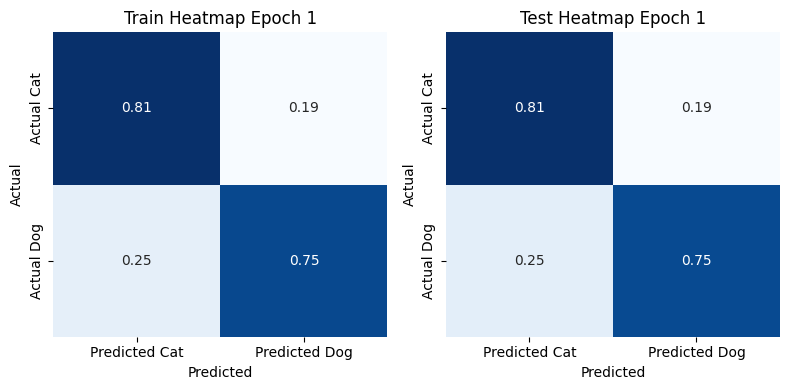

Epoch 2/10: Train loss = 0.4025, Train accuracy = 0.8173, Test loss = 0.4151, Test accuracy = 0.8120


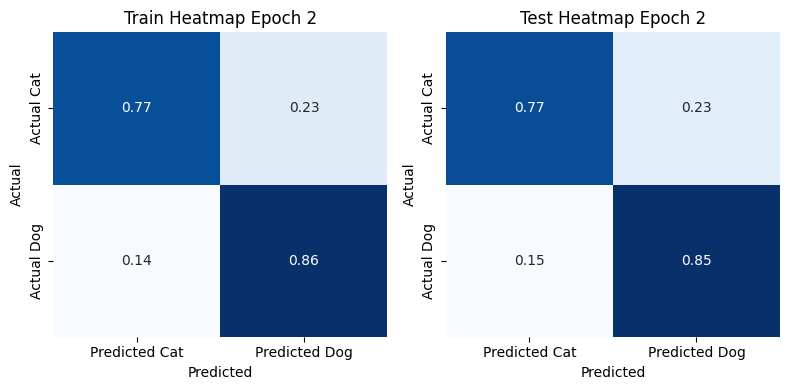

Epoch 3/10: Train loss = 0.4056, Train accuracy = 0.8170, Test loss = 0.4218, Test accuracy = 0.8060


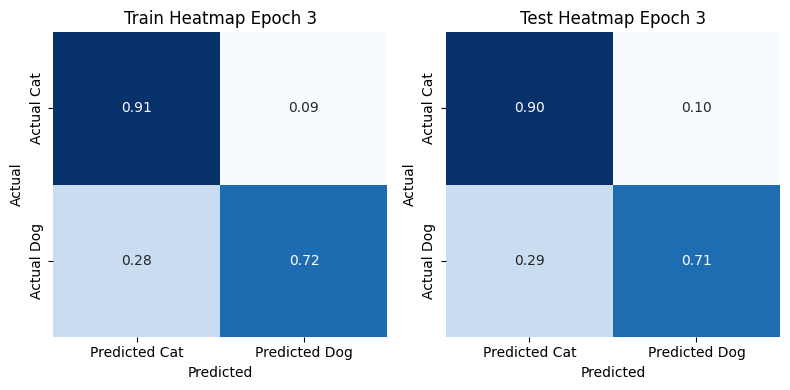

Epoch 4/10: Train loss = 0.3510, Train accuracy = 0.8453, Test loss = 0.3763, Test accuracy = 0.8302


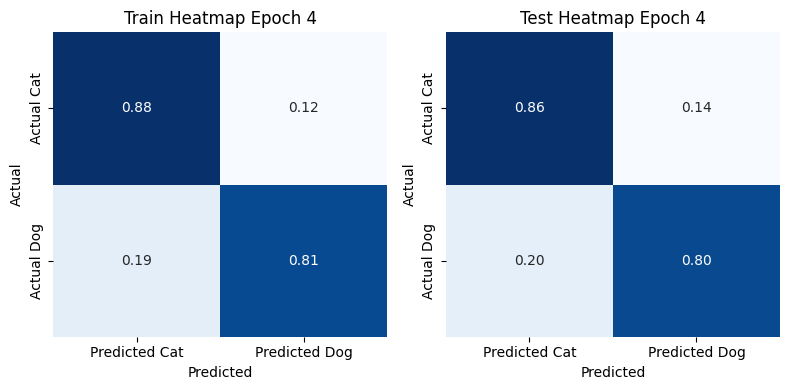

Epoch 5/10: Train loss = 0.3376, Train accuracy = 0.8535, Test loss = 0.3696, Test accuracy = 0.8335


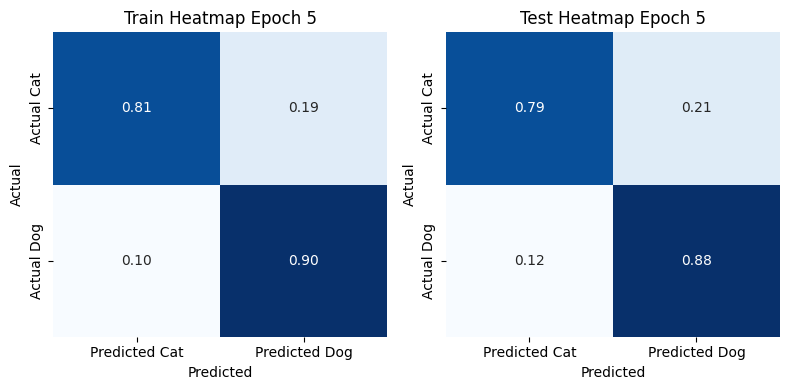

Epoch 6/10: Train loss = 0.3025, Train accuracy = 0.8680, Test loss = 0.3484, Test accuracy = 0.8464


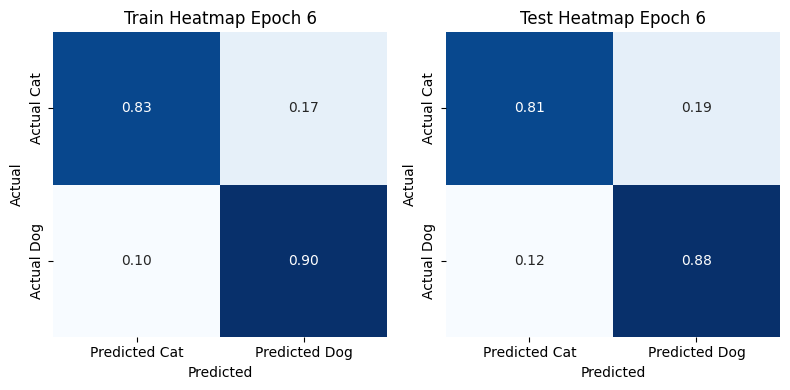

Epoch 7/10: Train loss = 0.4616, Train accuracy = 0.7944, Test loss = 0.5032, Test accuracy = 0.7854


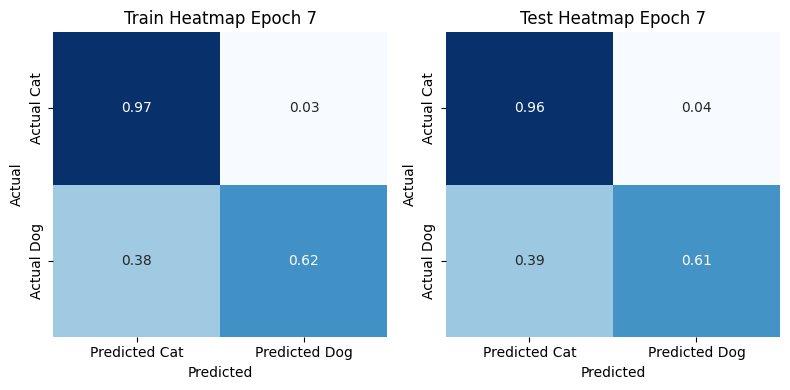

Epoch 8/10: Train loss = 0.2593, Train accuracy = 0.8927, Test loss = 0.3201, Test accuracy = 0.8592


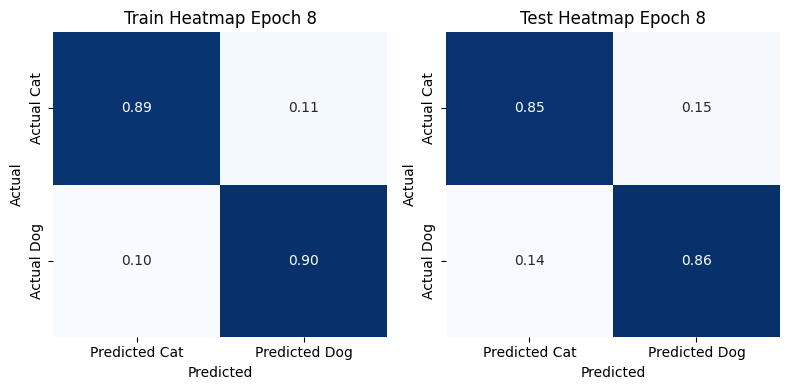

Epoch 9/10: Train loss = 0.2495, Train accuracy = 0.8963, Test loss = 0.3216, Test accuracy = 0.8600


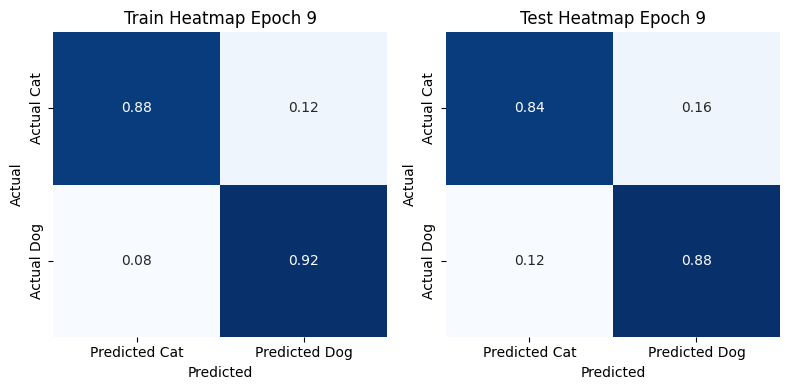

Epoch 10/10: Train loss = 0.2479, Train accuracy = 0.8969, Test loss = 0.3213, Test accuracy = 0.8606


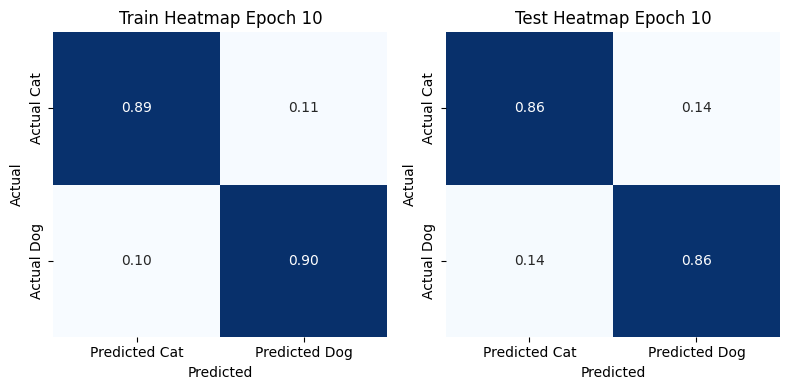

Training complete.


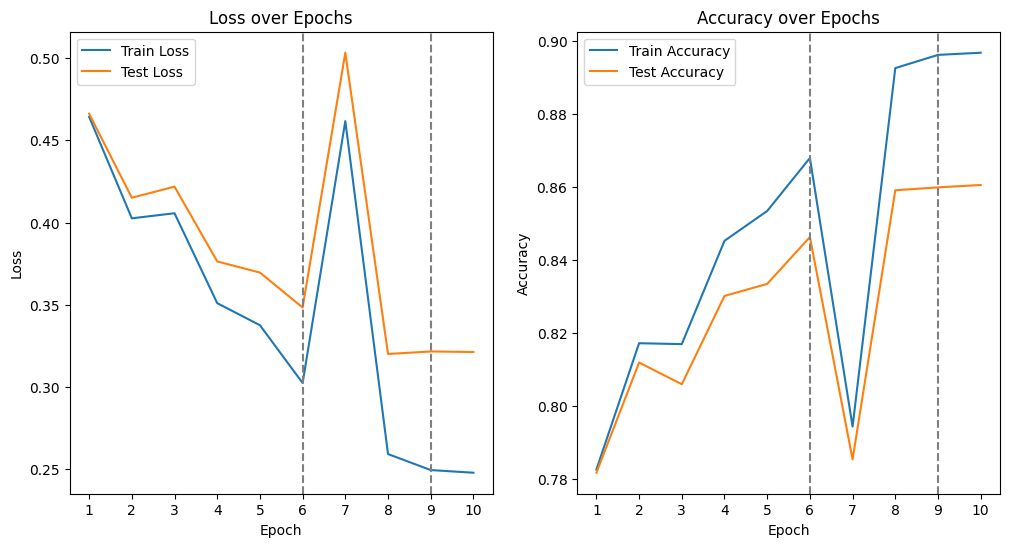

In [8]:
train(model15_1,"model_weights/model15_1.pt",criterion,train_dataset,test_dataset)